In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function that calculates the Cramer's V correlation coefficient between two categorical variables
# INPUT:
# x: first categorical variable
# y: second categorical variable
# OUTPUT:
# Cramer's V correlation coefficient

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [3]:
# Function that calculates the Cramer's V correlation coefficient between all pairs of categorical variables in the df
# INPUT:
# df: dataframe
# OUTPUT:
# Cramer's V correlation coefficient matrix

def calculate_cramer_v(df):
    variables = df.columns[df.columns.str.startswith(('MH', 'TRT', 'SOC', 'CVdeath', 'AMI', 'HEMORRHAGE'))]
    n = len(variables)
    result_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                result_matrix[i, j] = 1.0
            else:
                result_matrix[i, j] = cramers_v(df[variables[i]], df[variables[j]])
    
    return pd.DataFrame(result_matrix, index=variables, columns=variables)

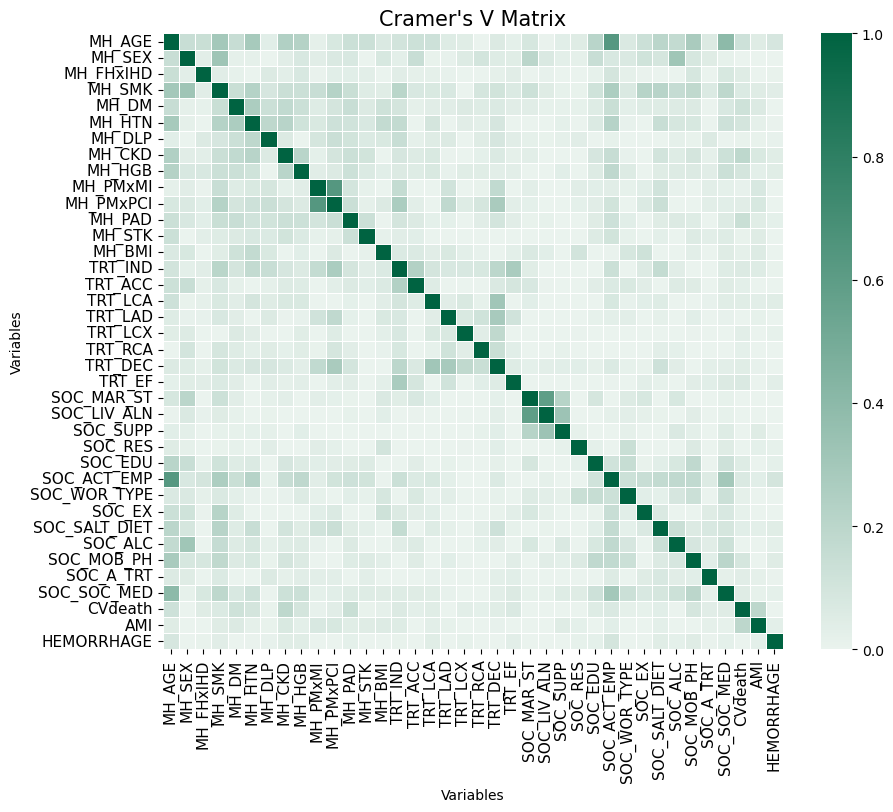

In [4]:
# Load the data
data = pd.read_csv('DATA.csv')
correlation_matrix = calculate_cramer_v(data)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap=sns.light_palette("#006341", as_cmap=True), vmin=0, vmax=1, linewidths=.5)
plt.title("Cramer's V Matrix", fontsize=15)
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()